<a href="https://colab.research.google.com/github/ElinorZhang0/ElinorZhang0/blob/main/Regression_on_votes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Eshoo vote 

Linear regression,  using other candidate numbers as features

See https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb#scrollTo=ZFR7roqSdejL

We use Scikit-learn's regression model for prediction



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Adjusted votes regression


Adjustments:
1. non-serious candidate counts as 20% serious candidates
2. votes between presidential and non-presidential year) (average of both year, subtract delta) 
presidential vote average: 190968	
non-presidential vote average: 151364		
delta: 39604

Average non serious candidate: 20,257

Median	14,411

Max	47,484 | Min	2,190			
Average (exclude min/max)	19239.22222

		

In [ ]:
table1 = pd.DataFrame(np.array(
[[2012,	2,  141306, 102364, 101702, 62760, 109620.25],
[2014,	2,	120240,	110773, 120240, 110773, 47557.05],
[2016,	1,	194621,	145105, 155017, 105501, 2892.75],
[2018,	1,	182488,	143692, 182488, 143692, 77580.88],
[2020,	2,	236976,	195436, 197372, 155832, 556821.16]]), 
 columns=['year',	'#of serious candidates' ,	'total votes',	
          'total adjusted votes (by condition 1)','total adjusted votes (by condition 2)',
          'total adjusted votes (by condition 1 & 2)','Total Spend'])
table1.head()


,year,#of serious candidates,total votes,total adjusted votes (by condition 1),total adjusted votes (by condition 2),total adjusted votes (by condition 1 & 2),Total Spend
0,2012.0,2.0,141306.0,102364.0,101702.0,62760.0,109620.25
1,2014.0,2.0,120240.0,110773.0,120240.0,110773.0,47557.05
2,2016.0,1.0,194621.0,145105.0,155017.0,105501.0,2892.75
3,2018.0,1.0,182488.0,143692.0,182488.0,143692.0,77580.88
4,2020.0,2.0,236976.0,195436.0,197372.0,155832.0,556821.16


In [ ]:
from numpy.ma.extras import median, average

x = int(102364.0/2.4), int(110773.0/2.4), int(145105.0/1.4) , int(143692.0/1.4), int(195436.0/2.6)
y = int(62760.0/2.4), int(110773.0/2.4), int(105501.0/1.4) , int(143692.0/1.4), int(155832.0/2.6)

print(x, average(x), median(x))
print(y, average(y), median(y))


(42651, 46155, 103646, 102637, 75167) 74051.2 75167.0
(26150, 46155, 75357, 102637, 59935) 62046.8 59935.0


In [ ]:
(141306.0	- 102364.0)/102364.0, 102364.0*1.4, (120240.0	 - 110773.0)/ 110773.0	
(141306.0	- 102364.0)/141306.0, (120240.0	 - 110773.0)/ 120240.0

(0.2755863162215334, 0.07873419827012641)

Model slope:     10953.150000000001
Model intercept: -21965838.8
predict 2022:  181430.50000000373


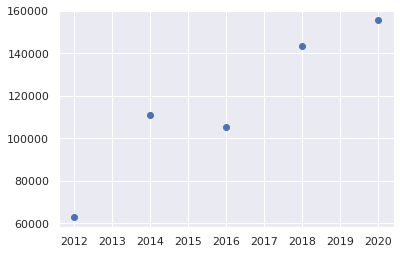

In [ ]:
# number of votes vs. number of serious candidates
model = LinearRegression(fit_intercept=True)
y = table1['total adjusted votes (by condition 1 & 2)']
x = table1[['year']]
model.fit(x, y)

yfit = model.predict(x)

plt.scatter(x, y)
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

predict_2022 = 10953.150000000001*2022+(-21965838.8)
print("predict 2022: ", predict_2022)

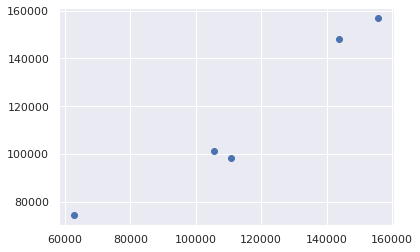

In [ ]:
# number of votes vs. number of serious candidates
model = LinearRegression(fit_intercept=True)
y = table1['total adjusted votes (by condition 1 & 2)']
x = table1[['#of serious candidates','total adjusted votes (by condition 1)','total adjusted votes (by condition 2)' ]]
model.fit(x, y)


yfit = model.predict(x)

plt.scatter(y, yfit)

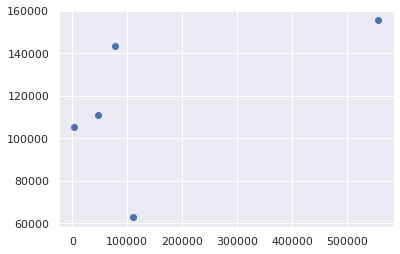

In [ ]:
# total spend vs. #of votes

model = LinearRegression(fit_intercept=True)
y = table1['total adjusted votes (by condition 1 & 2)']
x = table1[['Total Spend']]
model.fit(x, y)


yfit = model.predict(x)

plt.scatter(x, y)

In [ ]:
 # % of no party reference vs number of total votes

 # same data set for no party preference 

# Anna


In [ ]:
# Here's a copy of the data
table = pd.DataFrame(np.array(
[[2012,	86851,	2,	3,	1, 840020.31, 100431.55 , 739588.76 , 473954.43, 119848.58 , 354105.85 ,1313974.74, 24545.00],
[2014,	81295,	2,	3,	3, 1033082.95, 36046.28 ,  997036.67 , 683133.39, 15003.37 , 668130.02 , 1716216.34, 52106.00],
[2016,	132726,	1,	3,	1, 897040.35,  2892.75 , 894147.60 ,564170.9, 42574.09 , 521596.81 ,1461211.25, 26480.93],
[2018,	133993,	0,	3,	1, 960510.25, 77580.88 , 882929.37 , 523914.19, 76171.36 , 447742.83 ,1484424.44,	0],
[2020,	146225,	2,	4,	2, 1367967.57,  251279.05 ,  1116688.52 , 845766.59,   440463.95 ,  405302.64, 2213734.16, 797259.38]]), 
 columns=['year',	'votes',	'no_challengers_w_spend',	'no_challengers',	'no_republicans',	'Eshoo_spend_primary_total','Eshoo_spend_primary_ads','Eshoo_spend_primary_other', 'Eshoo_spend_general_total',	'Eshoo_spend_general_ad', 'Eshoo_spend_general_other','Eshoo_spend_overall','challenger_spend_overall'])
table.head()

,year,votes,no_challengers_w_spend,no_challengers,no_republicans,Eshoo_spend_primary_total,Eshoo_spend_primary_ads,Eshoo_spend_primary_other,Eshoo_spend_general_total,Eshoo_spend_general_ad,Eshoo_spend_general_other,Eshoo_spend_overall,challenger_spend_overall
0,2012.0,86851.0,2.0,3.0,1.0,840020.31,100431.55,739588.76,473954.43,119848.58,354105.85,1313974.74,24545.00
1,2014.0,81295.0,2.0,3.0,3.0,1033082.95,36046.28,997036.67,683133.39,15003.37,668130.02,1716216.34,52106.00
2,2016.0,132726.0,1.0,3.0,1.0,897040.35,2892.75,894147.60,564170.90,42574.09,521596.81,1461211.25,26480.93
3,2018.0,133993.0,0.0,3.0,1.0,960510.25,77580.88,882929.37,523914.19,76171.36,447742.83,1484424.44,0.00
4,2020.0,146225.0,2.0,4.0,2.0,1367967.57,251279.05,1116688.52,845766.59,440463.95,405302.64,2213734.16,797259.38


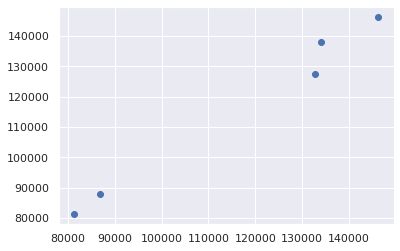

In [ ]:
model = LinearRegression(fit_intercept=True)
y = table['votes']
x = table[['challenger_spend_overall', 'no_republicans',  'Eshoo_spend_overall']] #'no_challengers_w_spend', 'no_challengers',
model.fit(x, y)


yfit = model.predict(x)

plt.scatter(y, yfit)

Be caseful, if you add all 5 variables the model is "saturated" and will find a perfect prediction. 

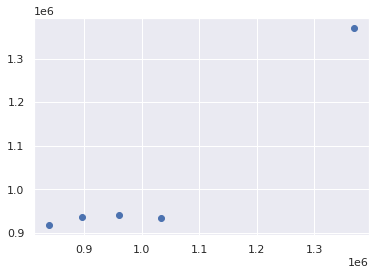

In [ ]:
# relationship between primary_money spend vs. # of challenger with spending vs. challenger spending overall
model = LinearRegression(fit_intercept=True)
y = table['Eshoo_spend_primary']
x = table[['no_challengers_w_spend', 'challenger_spend_overall']] 
model.fit(x, y)


yfit = model.predict(x)

plt.scatter(y, yfit)

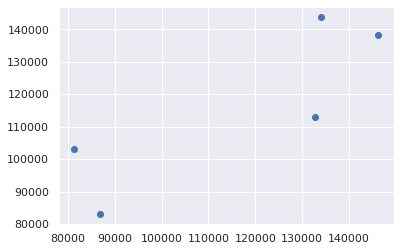

In [ ]:
# relationship between primary_money spend vs. # of challenger with spending vs. # of votes

model = LinearRegression(fit_intercept=True)
y = table['votes']
x = table[['Eshoo_spend_primary','no_challengers_w_spend']] 
model.fit(x, y)


yfit = model.predict(x)

plt.scatter(y, yfit)